In [223]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
%matplotlib inline

In [224]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [225]:
#READ THE IMAGE
ct_liver = cv2.imread('JPEG/0019.jpeg') 
img = ct_liver.copy()  # DISPLAY
img2 = ct_liver.copy()

True

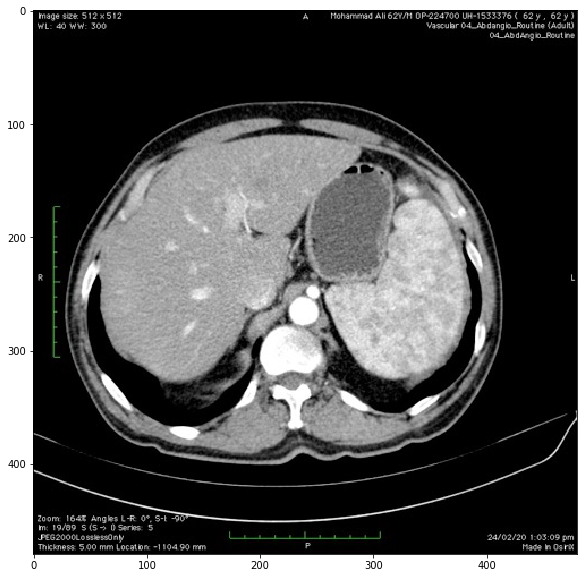

In [226]:
display(ct_liver)
cv2.imwrite('1 CT Image.jpeg',ct_liver)

In [227]:
# APPLY BLUR
img = cv2.medianBlur(img,3) # DISPLAY

True

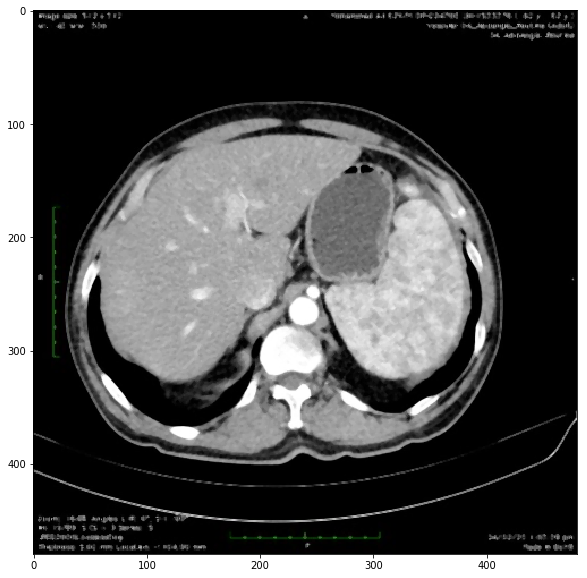

In [228]:
display(img)
cv2.imwrite('2 Blurred Image.jpeg',img)

In [229]:
# CONVERT TO GRAY SCALE
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [230]:
# APPLY THRESHOLD NOT BINARY ==> APPLY OTSU'S METHOD
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # DISPLAY

True

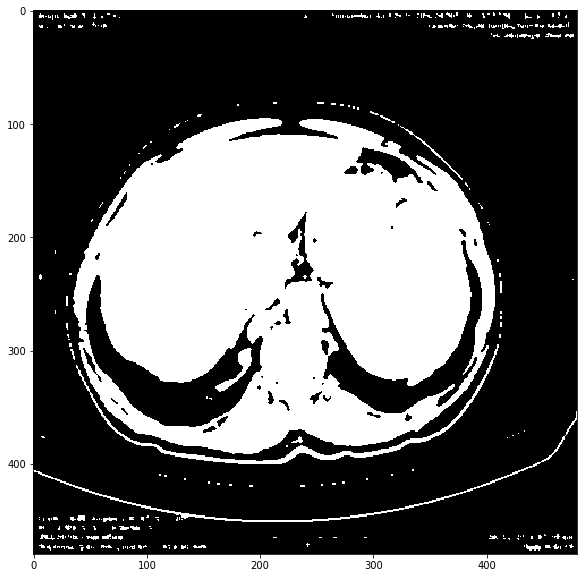

In [231]:
display(thresh)
cv2.imwrite('3 OTSU Threshold.jpeg',thresh)

In [232]:
# NOISE REMOVAL (OPTIONAL)
kernel = np.ones((3,3),np.uint8)

In [233]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)     # DISPLAY

True

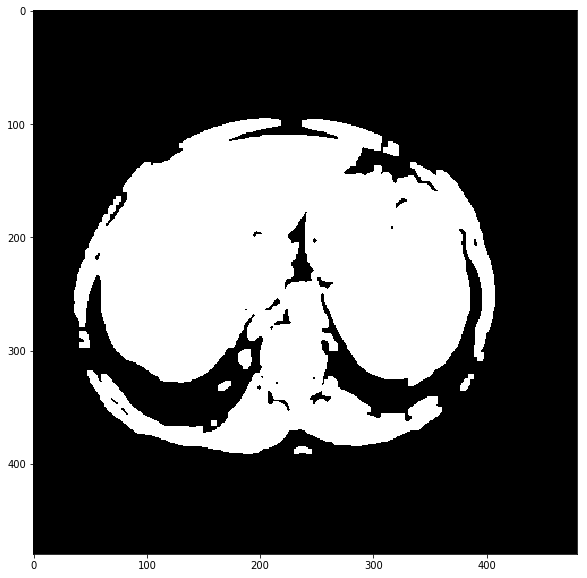

In [234]:
display(opening)
cv2.imwrite('4 Noise Removed Image.jpeg',opening)

In [235]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)  # DISPLAY

True

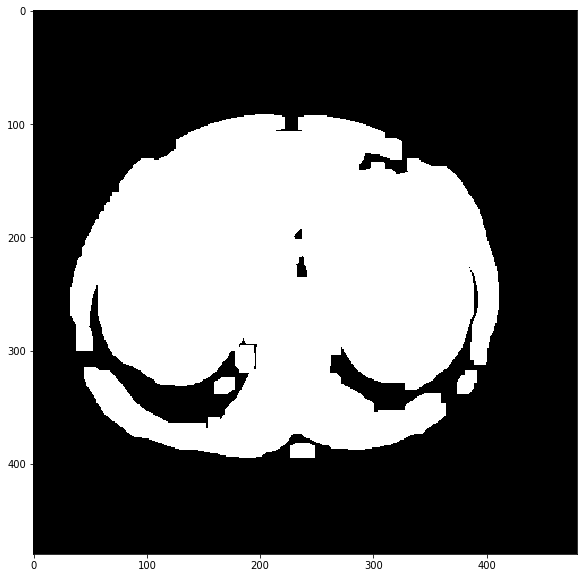

In [236]:
display(sure_bg)
cv2.imwrite('5 Sure Background.jpeg',sure_bg)

In [237]:
# DISTANCE TRANSFORM
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) # DISPLAY

True

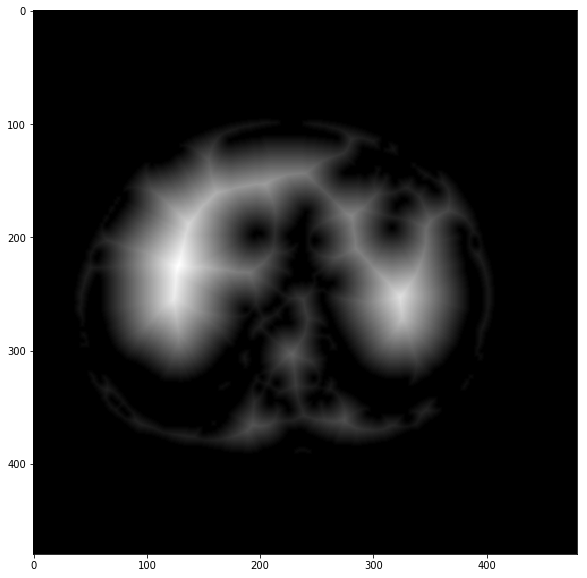

In [238]:
display(dist_transform)
cv2.imwrite('6 Distance Transform.jpeg',dist_transform)

In [239]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0) # DISPLAY

True

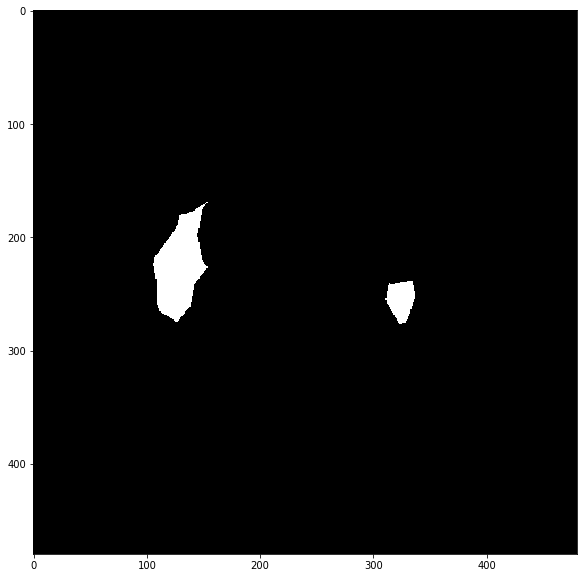

In [240]:
display(sure_fg)
cv2.imwrite('7 Sure Foreground.jpeg',sure_fg)

In [241]:
sure_fg = np.uint8(sure_fg)

In [242]:
unknown = cv2.subtract(sure_bg,sure_fg) # DISPLAY

True

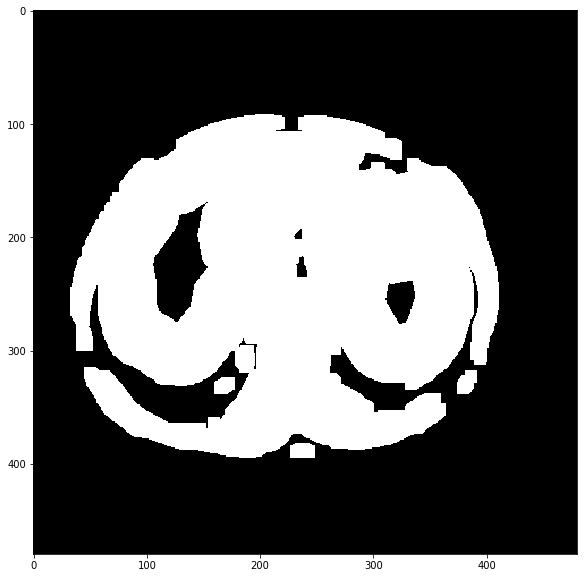

In [243]:
display(unknown)
cv2.imwrite('8 Unknown.jpeg',unknown)

In [244]:
# CREATING MARKERS => 3 STEPS

# 1. GETTING MARKERS

ret, markers = cv2.connectedComponents(sure_fg)

In [245]:
markers = markers + 1

In [246]:
markers[unknown == 255] = 0  # DISPLAY

True

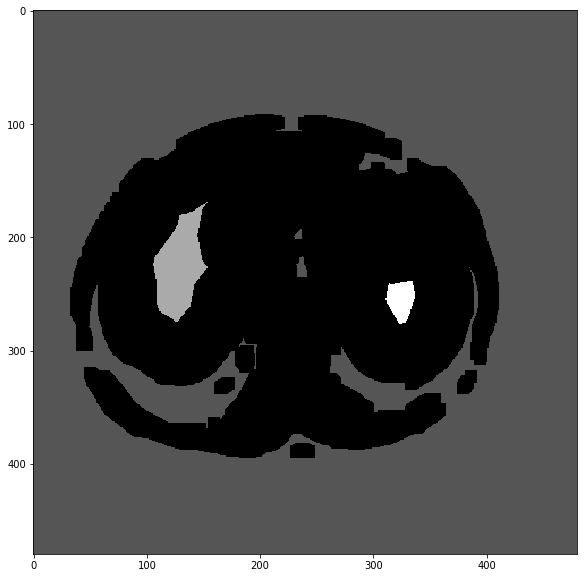

In [247]:
display(markers)
cv2.imwrite('9 Marked Image.jpeg',markers)

In [248]:
markers = cv2.watershed(img,markers)   # DISPLAY

True

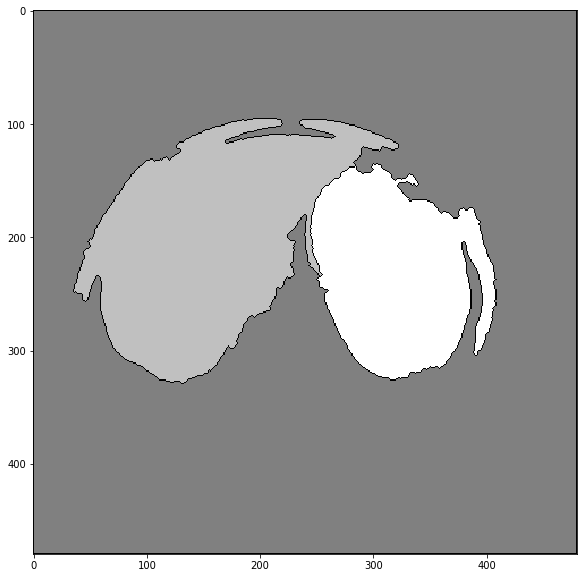

In [249]:
display(markers)
cv2.imwrite('10 Markers.jpeg',markers)

In [250]:
image, contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [251]:
for i in range(len(contours)) :
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours(ct_liver,contours,i,(255,0,0),1)

True

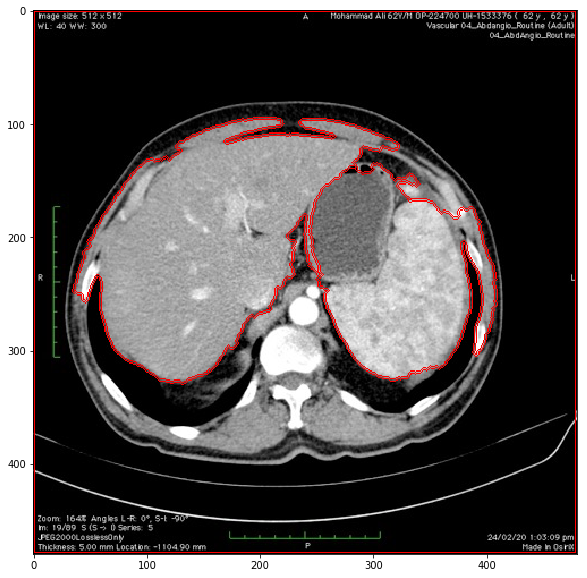

In [252]:
display(ct_liver)
cv2.imwrite('11 Liver Detected Image.jpeg',ct_liver)

In [253]:
# contours

In [254]:
mask = np.zeros(ct_liver.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)
a = cv2.drawContours(mask, [largest_areas[-3]], 0, (255,255,255,255), -1)
# removed = cv2.add(ct_liver, mask)

# cv2.imwrite("removed.png", removed)

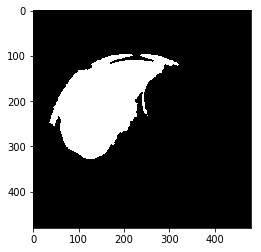

In [255]:
plt.imshow(mask)

In [256]:
final_im = mask*img2

True

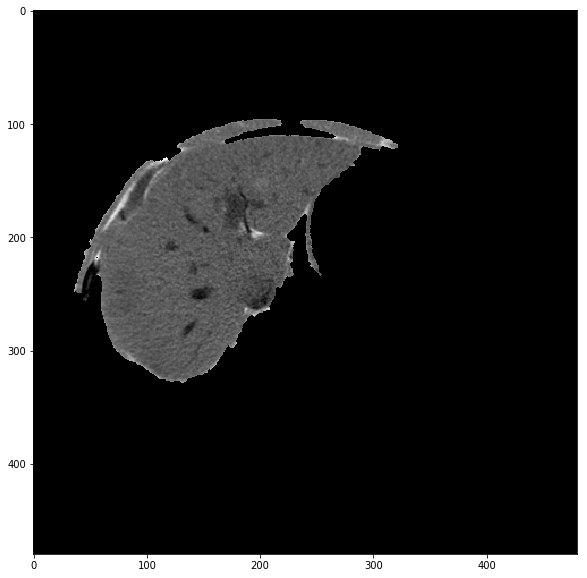

In [257]:
display(final_im)
cv2.imwrite('12 Segmented Image.jpeg',final_im)

In [183]:
res_img = final_im.copy()

In [56]:
dst =cv2.ximgproc.anisotropicDiffusion(final_im, res_img, 0.5, 2)

TypeError: only size-1 arrays can be converted to Python scalars